In [1]:
import os
import glob as glob
import numpy as np
import datetime
import utils
import shutil
import tensorboard
import time
import cv2
import matplotlib.pyplot as plt
import pandas as pd
%load_ext tensorboard
now = datetime.datetime.now()
date_string = now.strftime("%Y-%m-%d_%H-%M-%S")
!mkdir logs_yolo/yolov5-{date_string}
curr_dir = f'logs_yolo/yolov5-{date_string}'
np.random.seed(2024)

In [2]:
t1 = time.perf_counter()

In [3]:
TRAIN = True
EPOCHS = 100
star = 10
BH = 1
num_photo = 500
batch_size = 16
size = 1024
BH_lower = 64
BH_upper = 75

In [4]:
data_dirs = glob.glob(f"/mnt/c/fyq/tele_datasets/stars{star}_BH{BH}_num{num_photo}_rect*_BHSize{BH_lower}:{BH_upper}")
assert len(data_dirs) == 1, "Please specify more parameters!"
data_dir = data_dirs[0]
data_dir

'/mnt/c/fyq/tele_datasets/stars10_BH1_num500_rect_wl5.000e-08_D6.50_F6.5_BHSize64:75'

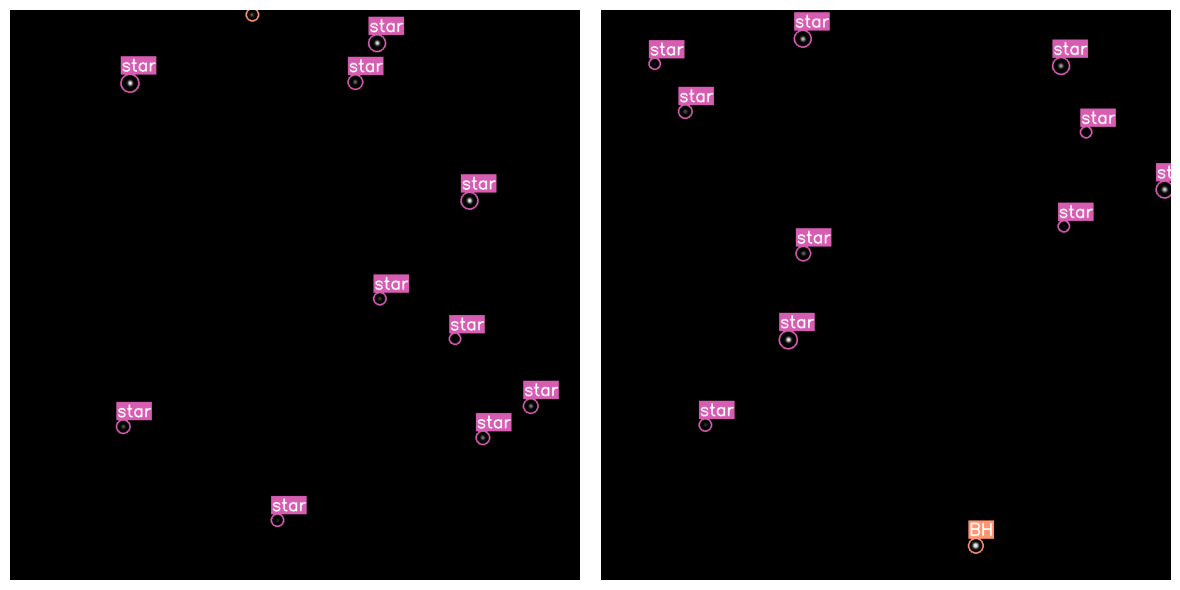

In [5]:
# Visualize a few training images.
utils.labels_plot(
    image_paths=f'{data_dir}/train/images/*',
    label_paths=f'{data_dir}/train/labels/*',
    num_samples=2, curr_dir=curr_dir
)

In [6]:
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

In [7]:
%tensorboard --logdir yolov5/runs/train

Reusing TensorBoard on port 6006 (pid 15409), started 1:15:19 ago. (Use '!kill 15409' to kill it.)

In [8]:
%cd yolov5

/home/fyq/deepshadow/yolov5


In [9]:
RES_DIR = set_res_dir()
# yolov5s.pt
if TRAIN:
    !python train.py --data {data_dir}/data.yaml --weights yolov5s.pt --img {size} --epochs {EPOCHS} \
        --batch-size {batch_size} --name {RES_DIR} --cache
else:
    !python train.py --weights yolov5s.pt --data {data_dir}/data.yaml --img {size} \
        --batch-size {batch_size} --name {RES_DIR} --evolve 1000 --cache

Current number of result directories: 1
results_2


train: weights=yolov5s.pt, cfg=, data=/mnt/c/fyq/tele_datasets/stars10_BH1_num500_rect_wl5.000e-08_D6.50_F6.5_BHSize64:75/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results_2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2024-1-18 Python-3.9.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)

hyperparameters: lr0=0.01, lrf=0.01, m

In [10]:
# Function to show validation predictions saved during training.
def show_valid_results(RES_DIR):
    !ls runs/train/{RES_DIR}
    EXP_PATH = f"runs/train/{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_pred.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

In [11]:
# Helper function for inference on images.
def inference(RES_DIR, data_path):
    # Directory to store inference results.
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference on images.
    !python detect.py --weights runs/train/{RES_DIR}/weights/best.pt \
    --source {data_path} --name {INFER_DIR}
    return INFER_DIR

In [12]:
def visualize(INFER_DIR):
# Visualize inference images.
    INFER_PATH = f"runs/detect/{INFER_DIR}"
    infer_images = glob.glob(f"{INFER_PATH}/*.jpg")
    print(infer_images)
    for pred_image in infer_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

In [13]:
RES_DIR

'results_2'

In [14]:
# show_valid_results(RES_DIR)

In [15]:
!rm -rf ../inference/*

In [16]:
inference_lst = list(np.random.choice(os.listdir(f"{data_dir}/train/images"), 10))

In [22]:
inference_lst

['BHs_5a041977-4c7e-4cf9-a6d4-424c9373eb53.png',
 'BHs_4880f7c8-85ed-4fe9-9021-a8617e83c9ab.png',
 'BHs_580afd59-16f2-49a6-8311-c75901f8d2fe.png',
 'BHs_164d9127-1e79-41ff-91db-dc783b285cdb.png',
 'BHs_19e88618-6d18-4927-8298-30dc604f6eac.png',
 'BHs_80073314-7ccd-4596-9753-fa936cdbf2f1.png',
 'BHs_c15f0f98-bba3-4e00-8ebd-aafc460d4bd2.png',
 'BHs_5761a4a6-9497-4701-bcdb-401f20666db0.png',
 'BHs_d4045461-63e2-46a1-a879-c543c8a942ce.png',
 'BHs_97c08964-c49a-4345-a1fb-b2b3f37bec08.png']

In [29]:
for i in inference_lst:
    !cp {data_dir}/train/images/{i} ../inference/{i}

In [30]:
inference(RES_DIR, '../inference')

Current number of inference detection directories: 1
inference_2


detect: weights=['runs/train/results_2/weights/best.pt'], source=../inference, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=inference_2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-1-18 Python-3.9.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /home/fyq/deepshadow/inference/BHs_164d9127-1e79-41ff-91db-dc783b285cdb.png: 640x640 10 stars, 1 BH, 2.8ms
image 2/10 /home/fyq/deepshadow/inference/BHs_19e88618-6d18-4927-8298-30dc604f6eac.png: 640x640 10 stars, 1 BH, 5.6ms
image 3/10 /home/fyq/deepshadow/inference/BHs_4880f7c8-85ed-4fe9-9021-a8617e83c9a

'inference_2'

In [31]:
t2 = time.perf_counter()

In [32]:
shutil.move('runs/', f'../{curr_dir}')

'../logs_yolo/yolov5-2024-01-24_22-35-21/runs'

In [33]:
curr_dir

'logs_yolo/yolov5-2024-01-24_22-35-21'

In [34]:
result = pd.read_csv(glob.glob(f'../{curr_dir}/**/*/results*.csv', recursive=True)[-1])
result.columns = result.columns.str.strip()
df_sorted = result.sort_values(by='metrics/mAP_0.5', ascending=False)
best = df_sorted.iloc[0, :]

In [35]:
box_loss = best['val/box_loss']
obj_loss = best['val/obj_loss']
cls_loss = best['val/cls_loss']
precision= best['metrics/precision']
recall = best['metrics/recall']
mAP_05 = best['metrics/mAP_0.5']
mAP_0595 = best['metrics/mAP_0.5:0.95']

In [38]:
!cat {data_dir}/tele_config.json

cat: '/mnt/c/fyq/tele_datasets/stars10_BH1_num500_rect_wl5.000e-08_D6.50_F6.5_BHSize64:75/tele_config.json': No such file or directory


In [ ]:
a = {
    'Model_name': 'yolov5',
    'Batch_size': batch_size,
    'Resolution': size,
    'date': date_string,
    'Training Epoch': EPOCHS,
    'box_loss' : box_loss,
    'obj_loss' : obj_loss,
    'cls_loss' : cls_loss,
    'precision' : precision,
    'recall' : recall,
    'mAP_0.5' : mAP_05,
    'mAP_0.5:0.95': mAP_0595,
    'No. training': num_photo / 5 *4,
    'No. testing': num_photo / 5,
    'No. star': star,
    'No. BH': BH,
    'Time': t2 - t1,
    'BH_lower_size': 
}

df = pd.read_excel('../logs_yolo/results.xlsx')
df = pd.concat([df, pd.DataFrame([a])], ignore_index=True)
df.to_excel('../logs_yolo/results.xlsx', index=False)

In [ ]:
df

,date,Model_name,Batch_size,Resolution,No. training,No. testing,Training Epoch,More,box_loss,obj_loss,cls_loss,precision,recall,mAP_0.5,mAP_0.5:0.95,No. star,No. BH,Time
0,2024-01-15_08-31-37,yolov5,32,1000,NaN,NaN,200,NaN,0.010316,0.070310,0.001464,0.91629,0.80030,0.85003,0.488970,NaN,NaN,NaN
1,2024-01-15_13-43-25,yolov5,32,900,NaN,NaN,300,NaN,0.008457,0.055789,0.000910,0.92695,0.82520,0.87700,0.442880,NaN,NaN,NaN
2,2024-01-18_14-59-05,yolov5,16,1000,NaN,NaN,300,NaN,0.009994,0.083809,0.000672,0.94751,0.82233,0.88315,0.549000,NaN,NaN,NaN
3,2024-01-18_17-38-36,yolov7,8,800,400.0,100.0,300,NaN,0.035080,0.017080,0.001179,0.91040,0.81040,0.82440,0.392100,100.0,10.0,NaN
4,2024-01-18_21-19-40,yolov5,16,1000,800.0,200.0,300,NaN,0.009994,0.083809,0.000672,0.94751,0.82233,0.88315,0.549000,20.0,10.0,NaN
5,2024-01-18_23-03-06,yolov5,16,1000,4000.0,1000.0,2000,NaN,0.009792,0.080352,0.000591,0.95220,0.84485,0.89292,0.571150,20.0,10.0,1903.525178
6,2024-01-19_09-33-44,yolov5,16,1000,4000.0,1000.0,250,NaN,0.010062,0.084277,0.000717,0.94341,0.81718,0.87528,0.531880,20.0,10.0,1464.442135
7,2024-01-19_20-42-32,yolov5,16,1000,8000.0,2000.0,200,NaN,0.005050,0.005558,0.000104,0.96955,0.89413,0.92392,0.734570,10.0,1.0,22788.763659
8,2024-01-20_09-44-30,yolov5,16,1000,800.0,200.0,200,NaN,0.008687,0.026217,0.000458,0.96745,0.89410,0.91481,0.632240,20.0,10.0,2349.951691
9,2024-01-20_11-05-05,yolov5,16,1000,4000.0,1000.0,200,NaN,0.006175,0.019700,0.000284,0.98042,0.90370,0.93779,0.750890,20.0,10.0,24697.725679
